# Homework 4
DASC 512  
Richy Peterson

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms  # Note this is a new addition
import statsmodels.graphics.api as smg
from matplotlib.ticker import FormatStrFormatter

sns.set_style('whitegrid')

# Problem 1

In [2]:
bats = pd.read_csv('BattingAverages.csv')
bats

,Name,Team,League,BattingAvg,AtBats,Hits,Unnamed: 6
0,Brandon Allen,Arizona Diamondbacks,National League,0.202,104,21,NaN
1,Eric Byrnes,Arizona Diamondbacks,National League,0.226,239,54,NaN
2,Stephen Drew,Arizona Diamondbacks,National League,0.261,533,139,NaN
3,Felipe Lopez,Arizona Diamondbacks,National League,0.301,345,104,NaN
4,Miguel Montero,Arizona Diamondbacks,National League,0.294,425,125,NaN
...,...,...,...,...,...,...,...
441,Austin Kearns,Washington Nationals,National League,0.195,174,34,NaN
442,Nyjer Morgan,Washington Nationals,National League,0.351,191,67,NaN
443,Wil Nieves,Washington Nationals,National League,0.259,224,58,NaN
444,Josh Willingham,Washington Nationals,National League,0.260,427,111,NaN


In [3]:
bats.describe()

,BattingAvg,AtBats,Hits,Unnamed: 6
count,446.000000,446.000000,446.000000,0.0
mean,0.261188,341.959641,91.937220,NaN
std,0.033912,163.531870,49.942714,NaN
min,0.144000,101.000000,16.000000,NaN
25%,0.238000,197.250000,46.000000,NaN
50%,0.261000,334.000000,83.000000,NaN
75%,0.284000,487.500000,131.000000,NaN
max,0.365000,682.000000,225.000000,NaN


In [4]:
def add_normal_dist_on_ax(data, ax, color='black', label='Normal Dist'):
    '''
    Adds a normal distribution of the data to the ax specified. 
    '''
    mean = np.mean(data)
    stddev = np.std(data, ddof=1)
    normdist = stats.norm(loc=mean, scale=stddev)
    data_max = np.max(data)
    data_min = np.min(data)
    data_range = data_max - data_min
    pdf_x = np.linspace(data_min - .01 * data_range,data_max + 0.01 * data_max,1000)
    pdf = [normdist.pdf(xx) for xx in pdf_x]

    sns.lineplot(x=pdf_x,y=np.multiply(pdf, ax.get_ylim()[1]*.95 / (np.max(pdf))),ax=ax,color='black',label=label)


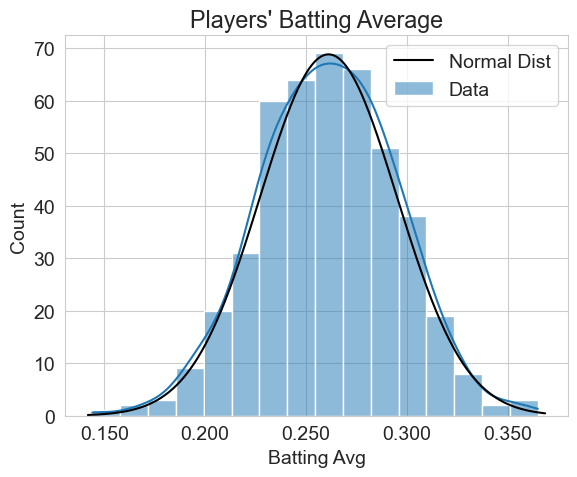

In [5]:
# (a)
plt.rc('font',size=14)
fig, ax = plt.subplots(figsize=(6,5))
sns.histplot(data=bats,x='BattingAvg',kde=True,bins=16,label='Data')
ax.set_title('Players\' Batting Average')
ax.set_xlabel('Batting Avg')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))

add_normal_dist_on_ax(bats['BattingAvg'],ax=ax)

fig.tight_layout()
fig.savefig('4_1a_batting_avg_distribution.png')



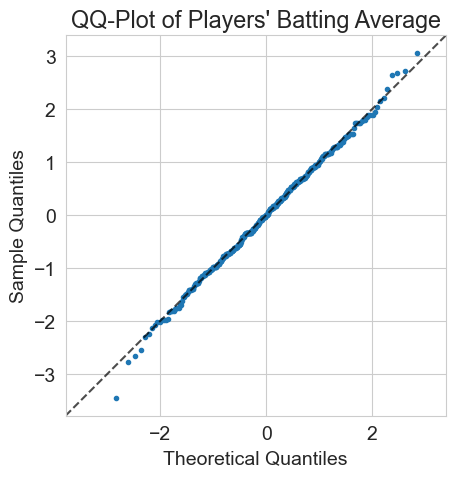

In [6]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_title('QQ-Plot of Players\' Batting Average')
pp = sm.ProbPlot(data=bats['BattingAvg'], dist=stats.norm, fit=True)
qq = pp.qqplot(marker='.', ax=ax)
sm.qqline(ax=ax, line='45', alpha=0.7, color='black', linestyle='--')
ax.set_box_aspect(1)
fig.tight_layout()
fig.savefig('4_1a_qq_plot.png')

In [7]:
stat, pval = stats.normaltest(bats['BattingAvg'])
pval

0.7882133921351571

In [8]:
# (b)
a = bats['BattingAvg']
mu0 = .265
alpha = 0.05
alternative = 'greater'

t, pval = stats.ttest_1samp(a=a,popmean=mu0, alternative=alternative)
print(f't: {t}')
print(f'p value: {pval}')

t: -2.3737364339567857
p value: 0.990983645805079


t: -2.3737364339567857
p value: 0.009016354194920978


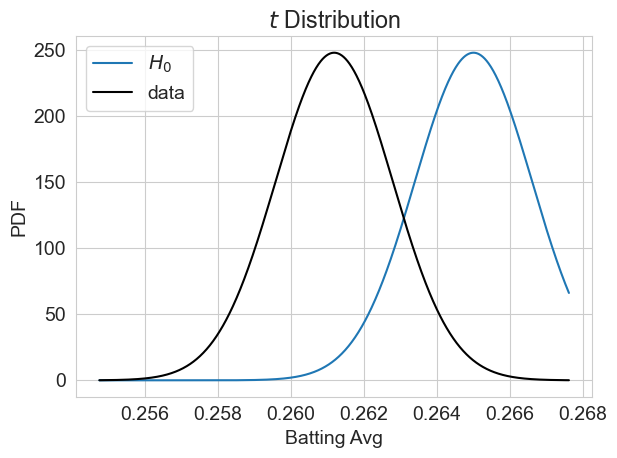

In [9]:
# Just experimenting with other values and visualizing the hypothesis distribution and sample t distribution
mu0 = .265
alternative='less'
t, pval = stats.ttest_1samp(a=a,popmean=mu0, alternative=alternative)
print(f't: {t}')
print(f'p value: {pval}')


n = len(a)
df = n - 1
sigma = np.std(a, ddof=1)
sem = sigma/np.sqrt(n)
dist = stats.t(df=df,loc=mu0,scale=sem)

pdf_x = np.linspace(a.mean()-4*sem,a.mean()+4*sem,1000)
pdf = [dist.pdf(xx) for xx in pdf_x]


fig, ax = plt.subplots()
ax.plot(pdf_x, pdf,label='$H_0$')
ax.set_title('$t$ Distribution')
ax.set_xlabel('Batting Avg')
ax.set_ylabel('PDF')
ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))


data = a
mean = np.mean(data)
stddev = np.std(data, ddof=1)
sem = stddev / np.sqrt(n)
tdist = stats.t(df=df, loc=mean, scale=sem)
data_max = np.max(data)
data_min = np.min(data)
data_range = data_max - data_min
pdf_x = np.linspace(mean - 4 * sem, mean + 4 * sem,1000)
pdf = [tdist.pdf(xx) for xx in pdf_x]

sns.lineplot(x=pdf_x,y=pdf,ax=ax,color='black',label='data')



fig.tight_layout()



In [10]:
dist.ppf(q=alpha)

0.26235324418415734

<Axes: ylabel='Density'>

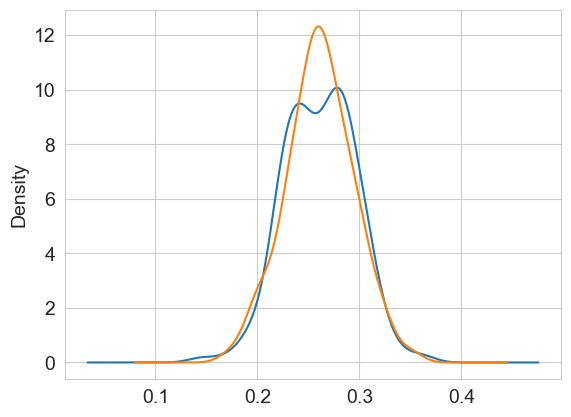

In [12]:
# (c)
nl = bats[bats['League']=='National League']['BattingAvg']
al = bats[bats['League']=='American League']['BattingAvg']

al.plot(kind='kde')
nl.plot(kind='kde')



In [13]:
al.describe()

count    206.000000
mean       0.261359
std        0.034848
min        0.144000
25%        0.236000
50%        0.263500
75%        0.285750
max        0.365000
Name: BattingAvg, dtype: float64

In [14]:
nl.describe()

count    240.000000
mean       0.261042
std        0.033159
min        0.171000
25%        0.239750
50%        0.260000
75%        0.282000
max        0.353000
Name: BattingAvg, dtype: float64

In [15]:
# 2 sample t test
# H0 : mean_al - mean_nl = 0,  Ha: mean_al - mean_nl != 0

t, pval = stats.ttest_ind(a=al, b=nl, equal_var=False, alternative='two-sided')
print(f't: {t}')
print(f'p value: {pval}')



t: 0.0981100482112505
p value: 0.9218909995969221


# Problem 2

In [16]:
# (a)

bt = pd.read_csv('BodyTemp.csv')
bt

,Gender,BodyTemp,Unnamed: 2
0,Female,99.6,NaN
1,Female,97.8,NaN
2,Female,98.7,NaN
3,Female,99.2,NaN
4,Female,99.1,NaN
...,...,...,...
143,Male,97.8,NaN
144,Male,98.0,NaN
145,Male,99.2,NaN
146,Male,98.7,NaN


In [17]:
bt.describe()

,BodyTemp,Unnamed: 2
count,148.000000,0.0
mean,98.234459,NaN
std,0.737592,NaN
min,96.200000,NaN
25%,97.800000,NaN
50%,98.300000,NaN
75%,98.700000,NaN
max,100.800000,NaN


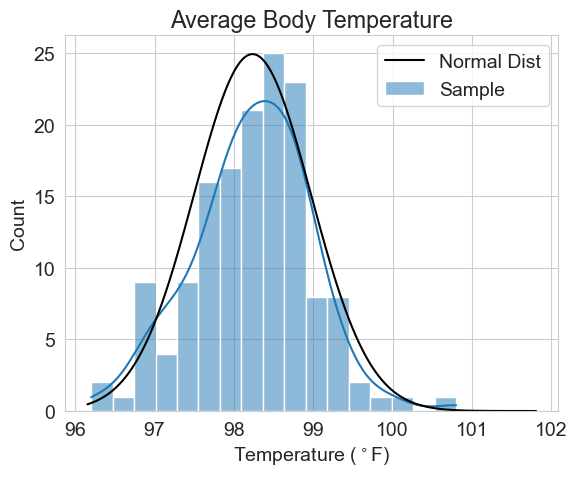

In [18]:
plt.rc('font',size=14)
fig, ax = plt.subplots(figsize=(6,5))
sns.histplot(data=bt,x='BodyTemp',kde=True,bins=17,label='Sample')
ax.set_title('Average Body Temperature')
ax.set_xlabel('Temperature ($^\circ$F)')

add_normal_dist_on_ax(bt['BodyTemp'],ax=ax)

fig.tight_layout()
fig.savefig('4_2a_hist_body_temp.png')


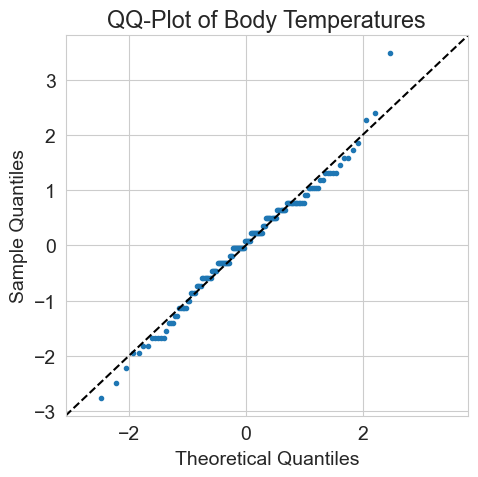

In [28]:
fig, ax = plt.subplots(figsize=(5,5))
pp = sm.ProbPlot(data=bt['BodyTemp'],dist=stats.norm, fit=True)
qq = pp.qqplot(marker='.', ax=ax)
sm.qqline(ax=ax, line='45', color='black', linestyle='--')
ax.set_title('QQ-Plot of Body Temperatures')
fig.tight_layout()
fig.savefig('4_2a_qqplot_body_temp.png')

In [20]:
# Omnibus test
stat, pval = stats.normaltest(a=bt['BodyTemp'])
pval

0.3163009429969709

In [21]:
# (b)
# H0: mu = 98.6,   Ha: mu != 98.6

data = bt['BodyTemp']
mu0 = 98.6
alpha = 0.05
alternative = 'two-sided'


n = len(data)
s = data.std()
sem = s / np.sqrt(n)

t, pval = stats.ttest_1samp(a=data, popmean=mu0, alternative=alternative)
print(f't: {t}')
print(f'p value: {pval}')


t: -6.0290650332362565
p value: 1.2722953424773367e-08


In [29]:
s

0.7375924097841119

In [22]:
# (c)
delta = 0.2
effect_size = delta / s
power = None
nobs = n

sms.tt_solve_power(effect_size=effect_size, nobs=nobs, alpha=alpha, power=power, alternative=alternative)

0.9061011161664535

In [30]:
effect_size

0.2711524648939088

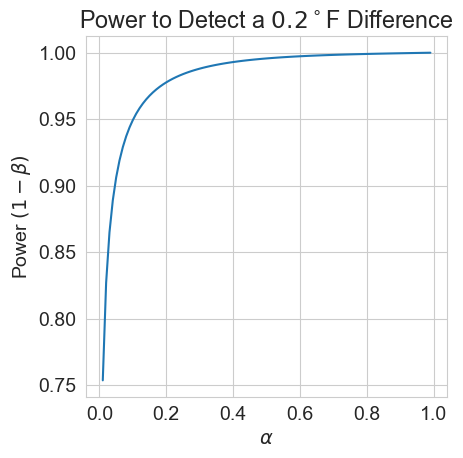

In [23]:
# (d)
alphas = np.linspace(0.01, 0.99, 99)
powers = [sms.tt_solve_power(effect_size=effect_size, nobs=nobs, alpha=alpha, power=power, alternative=alternative) 
          for alpha in alphas]

fig, ax = plt.subplots()
sns.lineplot(x=alphas,y=powers,ax=ax)
ax.set_title(r'Power to Detect a $0.2^\circ$F Difference')
ax.set_xlabel(r'$ \alpha $')
ax.set_ylabel(r'Power $(1 - \beta)$')
ax.set_box_aspect(1)
fig.tight_layout()
fig.savefig('4_2d_power_plot.png')

<Axes: ylabel='Density'>

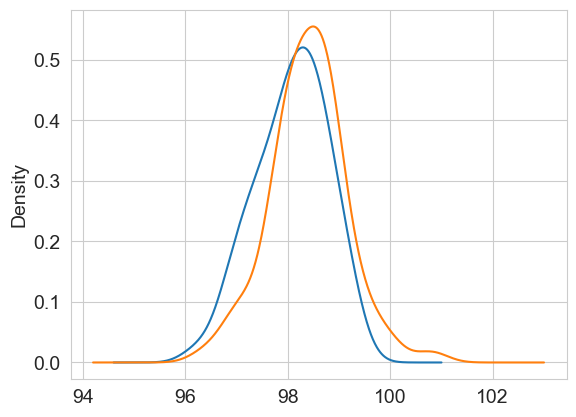

In [24]:
# (e)
males = bt[bt['Gender']=='Male']['BodyTemp']
females = bt[bt['Gender']=='Female']['BodyTemp']

males.plot(kind='kde')
females.plot(kind='kde')


In [25]:
males.describe()

count    74.000000
mean     98.070270
std       0.700827
min      96.200000
25%      97.600000
50%      98.150000
75%      98.600000
max      99.400000
Name: BodyTemp, dtype: float64

In [26]:
females.describe()

count     74.000000
mean      98.398649
std        0.741434
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: BodyTemp, dtype: float64

In [33]:
# 2 sample t test
# H0 : mean_male - mean_female = 0,  Ha: mean_male - mean_female != 0
# alpha = 0.05 still

t, pval = stats.ttest_ind(a=males, b=females, equal_var=False, alternative='two-sided')
print(f't: {t}')
print(f'p value: {pval}')


t: -2.768786409902567
p value: 0.006359237507331863
